![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [1]:
# on importe pandas avec :
import pandas as pd
import numpy as np
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

**Exercice :**
    
Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [2]:
ser_pop = pd.Series(data = [65,8,300,1200], index = ["France", "Suisse", "USA", "Chine"])

In [3]:
ser_pop

France      65
Suisse       8
USA        300
Chine     1200
dtype: int64

In [4]:
# pour extraire un élément, on utilise
ser_pop["France"]

65

In [5]:
# si on veut récupérer le 2ème élément, on peut utiliser :
ser_pop.iloc[1]

8

In [6]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(ser_pop) == pd.Series
print("Bien créée !")

Bien créée !


In [7]:
# on construit une série avec les populations de plus de 50
ser_pop_l50 = ser_pop[ser_pop>50]

In [8]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert ser_pop_l50.min() >= 50
print("Bravo !")

Bravo !


# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

**Exercice :**
    
Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [9]:
ser_pop.name = "Populations"
ser_pop.index.name = "Pays"
ser_pop

Pays
France      65
Suisse       8
USA        300
Chine     1200
Name: Populations, dtype: int64

# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [10]:
pd.isna(pd.Series([2,np.nan,4],index=['a','b','c']))

a    False
b     True
c    False
dtype: bool

In [11]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c']))

a     True
b    False
c     True
dtype: bool

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format es dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

*Indice :* Utilisez les informations ci-dessus

On utilisera :
```
pd.date_range(___)
np.random.randn(___)
pd.Series(___)
```

In [12]:
import datetime
dates = pd.date_range(start='2017-10-03', end = datetime.date.today(),freq = "D")
data = np.random.random(len(dates))

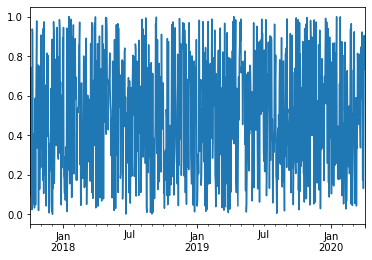

In [15]:
serie_temp = pd.Series(data=data,index=dates)
serie_temp.plot()

# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [16]:
frame1=pd.DataFrame(np.random.randn(10).reshape(5,2),
             index=["obs_"+str(i) for i in range(5)],
             columns=["col_"+str(i) for i in range(2)])
frame1

,col_0,col_1
obs_0,-0.244058,-0.149234
obs_1,-0.731710,-0.002547
obs_2,0.185558,0.864111
obs_3,-1.123187,0.835380
obs_4,0.597644,1.148977


# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [17]:
print(frame1.columns)

Index(['col_0', 'col_1'], dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [18]:
frame1.head(3)

,col_0,col_1
obs_0,-0.244058,-0.149234
obs_1,-0.731710,-0.002547
obs_2,0.185558,0.864111


Pour afficher un résumé du DF :

In [19]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, obs_0 to obs_4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_0   5 non-null      float64
 1   col_1   5 non-null      float64
dtypes: float64(2)
memory usage: 120.0+ bytes


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [20]:
airbnb = pd.read_csv('https://www.stat4decision.com/airbnb.zip')

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert airbnb["price"].dtype == object
print("Bien importé !")

Bien importé !


In [22]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59126 entries, 0 to 59125
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 47.8+ MB


In [23]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20190507030954,2019-05-07,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,...,f,f,flexible,f,f,1,1,0,0,0.28
1,5396,https://www.airbnb.com/rooms/5396,20190507030954,2019-05-08,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.44
2,7397,https://www.airbnb.com/rooms/7397,20190507030954,2019-05-07,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,2.47
3,8522,https://www.airbnb.com/rooms/8522,20190507030954,2019-05-08,GREAT FLAT w/ CITY VIEW,NaN,Really nice flat located in the 20th district ...,Really nice flat located in the 20th district ...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,0.01
4,9359,https://www.airbnb.com/rooms/9359,20190507030954,2019-05-07,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,"Since I live in the USA, it is difficult to ma...",Location! Location! Location! Just bring your ...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,NaN


Importer un fichier `.csv` qui a comme séparateur `;`, le nom du fichier est `base-dpt.csv`

In [24]:
base_dpt = pd.read_csv("./data/base-dpt.csv",sep=';')

In [25]:
base_dpt.columns

Index(['CODGEO', 'LIBGEO', 'REG', 'DEP', 'P14_POP', 'P09_POP', 'SUPERF',
       'NAIS0914', 'DECE0914', 'P14_MEN', 'NAISD16', 'DECESD16', 'P14_LOG',
       'P14_RP', 'P14_RSECOCC', 'P14_LOGVAC', 'P14_RP_PROP', 'NBMENFISC14',
       'PIMP14', 'MED14', 'TP6014', 'P14_EMPLT', 'P14_EMPLT_SAL', 'P09_EMPLT',
       'P14_POP1564', 'P14_CHOM1564', 'P14_ACT1564', 'ETTOT15', 'ETAZ15',
       'ETBE15', 'ETFZ15', 'ETGU15', 'ETGZ15', 'ETOQ15', 'ETTEF115',
       'ETTEFP1015', 'Geo Shape', 'geo_point_2d'],
      dtype='object')

In [26]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(base_dpt) == pd.DataFrame
print("Bien importé !")

Bien importé !


In [27]:
base_dpt.head()

,CODGEO,LIBGEO,REG,DEP,P14_POP,P09_POP,SUPERF,NAIS0914,DECE0914,P14_MEN,...,ETAZ15,ETBE15,ETFZ15,ETGU15,ETGZ15,ETOQ15,ETTEF115,ETTEFP1015,Geo Shape,geo_point_2d
0,95555,Saint-Gratien,11,95,20996.0,20258.0,2.42,1564.0,749.0,8909.817815,...,3.0,38.0,142.0,1078.0,225.0,214.0,335.0,67.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.274621...","48.9695044801, 2.28470111182"
1,95488,Pierrelaye,11,95,8155.0,7920.0,9.21,639.0,243.0,2891.000000,...,8.0,47.0,135.0,623.0,241.0,65.0,228.0,72.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.193617...","49.0190794714, 2.1606870483"
2,95543,Saint-Cyr-en-Arthies,11,95,242.0,229.0,3.89,9.0,4.0,93.154812,...,2.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,"{""type"": ""Polygon"", ""coordinates"": [[[1.732068...","49.058878265, 1.74176317637"
3,95523,La Roche-Guyon,11,95,446.0,447.0,4.61,18.0,21.0,186.507593,...,0.0,6.0,6.0,48.0,17.0,14.0,13.0,4.0,"{""type"": ""Polygon"", ""coordinates"": [[[1.623323...","49.0883415268, 1.63442788467"
4,95678,Villiers-Adam,11,95,838.0,828.0,9.82,45.0,29.0,340.831981,...,6.0,3.0,8.0,53.0,12.0,5.0,14.0,2.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.236020...","49.0697597649, 2.23847351378"


# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <http://www.fdic.gov/bank/individual/failed/banklist.html> 

In [28]:
web_bank = pd.read_html("http://www.fdic.gov/bank/individual/failed/banklist.html")
# cette fonction renvoie une liste de DataFrame afin de gérer plus d'un tableau dans une page
print(type(web_bank),len(web_bank))

<class 'list'> 1


In [29]:
web_bank[0].head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
1,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
2,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
3,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"
4,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019"


In [30]:
frame_bank = web_bank[0]

In [31]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(frame_bank) == pd.DataFrame
print("Bien importé !")

Bien importé !


# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

1- avec `pd.read_excel()` pour le fichier `credit2.xlsx`

In [32]:
credit2 = pd.read_excel("./data/credit2.xlsx")

In [33]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert credit2["Age"].max() == 83
print("Bravo !")

Bravo !


2- avec `pd.ExcelFile()` pour le fichier `ville.xls`

In [34]:
ville_excel = pd.ExcelFile("./data/ville.xls")

In [35]:
frame_ville = ville_excel.parse("ville")

In [36]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(frame_ville) == pd.DataFrame
print("Bravo !")

Bravo !


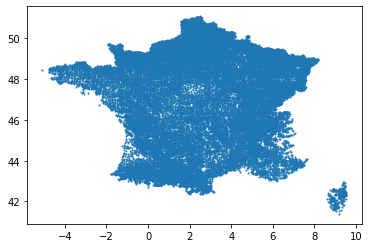

In [37]:
import matplotlib.pyplot as plt
plt.scatter(" Longitude ", " Latitude ",data=frame_ville, s=1)
plt.savefig("France.jpg")

# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [38]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///(...).sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

*Indice :* On commence par créer la connexion et ensuite on fait la requête `select * from salaries`, la connexion se fait en utilisant l'adresse : "sqlite:///./data/salaries.sqlite"

In [39]:
connexion=create_engine("sqlite:///./data/salaries.sqlite")
salaries = pd.read_sql_query("select * from salaries",connexion)

In [40]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          148654 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             148654 non-null  object 
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 14.7+ MB


In [41]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


In [42]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(salaries) == pd.DataFrame
print("Bravo !")

Bravo !


## Récupérer des données SAS

In [43]:
base_sas = pd.read_sas("./data/bce_uai.sas7bdat")

In [44]:
# on étudie les noms des écoles
base_sas["PATRONYME_UAI"].value_counts()

b'JULES FERRY'           499
b'JACQUES PREVERT'       370
b'JEAN MOULIN'           362
b'SAINT JOSEPH'          350
b'JEAN JAURES'           319
                        ... 
b'DE PLUM'                 1
b'HUBERT FILLAY'           1
b'EMILE MARTIN'            1
b'RUE DE QUIMPER'          1
b'LPO ROMAIN ROLLAND'      1
Name: PATRONYME_UAI, Length: 27874, dtype: int64

# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

**Exercice :** 
    
Triez les données sur les salaires en se basant sur le BasePay et le JobTitle

In [45]:
salaries_sorted = salaries.sort_values([ "JobTitle","BasePay"])

In [46]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert salaries_sorted["JobTitle"].min() == salaries_sorted["JobTitle"].iloc[0]
print("Bravo !")

Bravo !


## Exportez des fichiers 

La plupart des outils d'importation existent en exportation, on utilise :
```
frame.to_csv("fichier.csv")
```


**Exercice :**
    
Exportez les données salaries dans un fichier Excel

In [47]:
salaries_sorted.to_excel("./data/salaries.xlsx")

# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

**Exercice :**
    
Obtenir les moyennes et variances de la colonne `TotalPay` pour les données Salaries.


In [48]:
print(salaries["TotalPay"].mean(),salaries["TotalPay"].var())

74768.321971703 2551967821.8482866


**Exercice ++ :**

Calculer la moyenne des prix des appartements airbnb

*Attention :* la colonne `price`a des problèmes

In [49]:
airbnb["price"].dtype

dtype('O')

Le type 'O' est apppelé objet et n'est donc pas nmérique (donc pas de moyenne !!)

On commence par trasformer en numérique !

Deux indices :
- on peut utiliser la fonction `pd.to_numeric(___)`
- une colonne de texte a de nombreuses méthode, si on veut remplacer dans une colonne de texte, on utiliser : `data["colonne"].str.replace(___,___)`

In [50]:
# on ajoute une colonne à la fin du dataframe :
airbnb["price_num"] = pd.to_numeric(airbnb["price"].str.replace("$","").str.replace(",",""))

print(airbnb["price_num"].mean())

116.32598180157629


In [51]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert airbnb["price_num"].max() == 9379
print("Bravo !")

Bravo !


# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


**Exercice :**
    
Joindre deux dataframes (credit1 et credit2). On commence par importer `credit1.txt`


In [52]:
credit1 = pd.read_table("./data/credit1.txt")
credit2 = pd.read_excel("./data/credit2.xlsx")

In [53]:
credit_merged = pd.merge(credit1,credit2,left_on='Customer_ID',right_on='Customer_ID')

In [54]:
credit_merged.head()

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,...,Interested_in_Credit_Card,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner
0,24,3,10,229,2,40,13,0,5409,0,...,F,40,F,S,11,6,37,56,37073,F
1,12,2,12,8,1,47,5,2,5477,0,...,F,47,M,M,13,13,30,56,50721,F
2,36,0,0,0,0,35,31,0,5507,0,...,F,35,F,U,1,9,33,57,43578,T
3,0,0,0,0,0,45,-3,0,8,0,...,F,45,M,U,15,7,30,62,69553,F
4,48,0,0,0,0,13,39,0,158,0,...,F,13,F,S,0,7,27,64,37502,T


In [55]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert credit_merged.shape[1] == 31
print("Bravo !")

Bravo !


# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

**Exercice :**
    
Créez une variable dans le dataframe AirBnB pour obtenir 5 niveaux de prix.

In [56]:
airbnb["price_disc"] = pd.cut(airbnb["price_num"],5)
airbnb["price_disc2"] = pd.qcut(airbnb["price_num"],5)

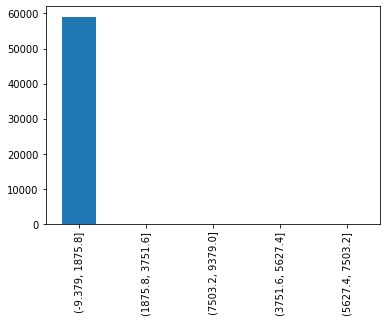

In [57]:
# on représente la distribution des modalités
airbnb["price_disc"].value_counts().plot(kind="bar")

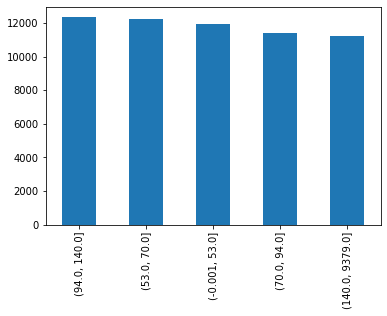

In [58]:
airbnb["price_disc2"].value_counts().plot(kind="bar")

In [59]:
assert airbnb["price_disc"].dtype == "category"
print("Bravo !")

Bravo !


# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

**Exercice :**
    
Afficher un tableau Pivot pour les données AirBnB. On veut afficher les moyenne des prix en fonction de deux colonnes du DataFrame

In [60]:
airbnb.pivot_table(values="price_num",index = "room_type", columns = "cancellation_policy", aggfunc = "mean")

cancellation_policy,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60
room_type,,,,,,
Entire home/apt,95.350408,104.016005,63.0,141.510807,253.656250,590.639286
Private room,109.948313,125.259901,NaN,92.999418,541.363636,440.000000
Shared room,73.564220,40.887324,NaN,64.224719,NaN,NaN


# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


**Exercice :**
    
- Données sur les salaires


- On utilise le `groupby()` pour rassembler les types d’emploi


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [61]:
salaries.groupby("JobTitle")["TotalPay"].agg(["mean","median","count"])

,mean,median,count
JobTitle,,,
ACCOUNT CLERK,44035.664337,49777.820,83
ACCOUNTANT,47429.268000,60076.240,5
ACCOUNTANT INTERN,29031.742917,17658.505,48
"ACPO,JuvP, Juv Prob (SFERS)",62290.780000,62290.780,1
ACUPUNCTURIST,67594.400000,67594.400,1
...,...,...,...
X-RAY LABORATORY AIDE,52705.880385,60333.125,26
X-Ray Laboratory Aide,50823.942700,60047.290,100
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000,53632.870,1


# Analyse d'une enquête avec pandas

Nous allons maintenant analyser des données d'enquête avec pandas. On utilisera l'enquête sur les développeurs mise en place par le site Stackoverflow pour l'année 2019

https://insights.stackoverflow.com/survey

On réupère les données :

In [62]:
enquete = pd.read_csv("./data/survey_results_public.zip")

In [63]:
# cette enquête est composée de 85 questions et s'adresse à 88883 personnes
enquete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

## Statitiques de base

On veut calculer des statistiques de bases

In [64]:
# calculer la moyenne du nombre d'heures travaillées
print(enquete["WorkWeekHrs"].mean())
#print(np.mean(enquete["WorkWeekHrs"]))

42.12719740950035


In [65]:
# si on veut automatiser le calcul, on peut utiliser :
for col in enquete.select_dtypes(np.number).columns:
    print("moyenne de la colonne {} :".format(col),enquete[col].mean())

moyenne de la colonne Respondent : 44442.0
moyenne de la colonne CompTotal : 551901414118.7615
moyenne de la colonne ConvertedComp : 127110.73842323056
moyenne de la colonne WorkWeekHrs : 42.12719740950035
moyenne de la colonne CodeRevHrs : 5.084307692307696
moyenne de la colonne Age : 30.336698649160446


In [66]:
# ou
enquete.select_dtypes(np.number).mean()

Respondent       4.444200e+04
CompTotal        5.519014e+11
ConvertedComp    1.271107e+05
WorkWeekHrs      4.212720e+01
CodeRevHrs       5.084308e+00
Age              3.033670e+01
dtype: float64

In [67]:
# si on veut une description d'une colonne, on utilise :
enquete["WorkWeekHrs"].describe()

count    64503.000000
mean        42.127197
std         37.287610
min          1.000000
25%         40.000000
50%         40.000000
75%         44.750000
max       4850.000000
Name: WorkWeekHrs, dtype: float64

In [68]:
# si on voir la nombre de réopndant par pays, on peut utiliser :
enquete["Country"].value_counts()

United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
North Korea                             1
Tonga                                   1
Sao Tome and Principe                   1
Saint Vincent and the Grenadines        1
Chad                                    1
Name: Country, Length: 179, dtype: int64

## Traitement des données manquantes

In [69]:
# completion par la médiane
enquete["WorkWeekHrs_compl"] = enquete["WorkWeekHrs"].fillna(enquete["WorkWeekHrs"].median())

In [70]:
enquete[ ["WorkWeekHrs_compl","WorkWeekHrs","CodeRevHrs"] ].describe()

,WorkWeekHrs_compl,WorkWeekHrs,CodeRevHrs
count,88883.000000,64503.000000,49790.000000
mean,41.543722,42.127197,5.084308
std,31.778837,37.287610,5.513931
min,1.000000,1.000000,0.000000
25%,40.000000,40.000000,2.000000
50%,40.000000,40.000000,4.000000
75%,40.000000,44.750000,6.000000
max,4850.000000,4850.000000,99.000000


## Plus de statistiques

On peut créer des fonctions sur mesure pour calculer des statistiques

In [71]:
def etendue(x):
    """ calcul l'étendue des données pour une colonne d'un DataFrame"""
    return x.max()-x.min()

In [72]:
sous_enquente = enquete[ ["WorkWeekHrs_compl","WorkWeekHrs","CodeRevHrs"] ]

In [73]:
sous_enquente.agg(["mean","median","std",etendue])

,WorkWeekHrs_compl,WorkWeekHrs,CodeRevHrs
mean,41.543722,42.127197,5.084308
median,40.000000,40.000000,4.000000
std,31.778837,37.287610,5.513931
etendue,4849.000000,4849.000000,99.000000


## Discrétisation des âges
On transforme la colonne âge en classes d'âges

In [74]:
enquete["Age_dic1"] = pd.cut(enquete["Age"],5)
enquete["Age_disc2"] = pd.cut(enquete["Age"],[0,18,25,35,45,65,100])

In [75]:
enquete["Age_disc3"] = pd.qcut(enquete["Age"],5)

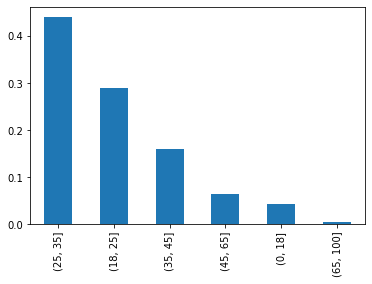

In [76]:
enquete["Age_disc2"].value_counts(normalize=True).plot(kind="bar")

# Aller plus loin, comparer plusieurs colonnes

In [77]:
mon_tableau_croise = enquete.pivot_table(values="WorkWeekHrs",index = ["Age_disc3",'EdLevel'],columns='MgrIdiot',
                    aggfunc=['count','mean'])

In [78]:
mon_tableau_croise

count  \
MgrIdiot                                                         I don't have a manager   
Age_disc3     EdLevel                                                                     
(0.999, 23.0] Associate degree                                                     11.0   
              Bachelor’s degree (BA, BS, B.Eng., etc.)                            104.0   
              I never completed any formal education                                0.0   
              Master’s degree (MA, MS, M.Eng., MBA, etc.)                          11.0   
              Other doctoral degree (Ph.D, Ed.D., etc.)                             1.0   
              Primary/elementary school                                             6.0   
              Professional degree (JD, MD, etc.)                                    5.0   
              Secondary school (e.g. American high school, Ge...                   33.0   
              Some college/university study without earning a...                   31.0   
(23.0, 27.0]  Associate degree                                                     13.0   
              Bachelor’s degree (BA, BS, B.Eng., etc.)                            181.0   
              I never completed any formal education                                3.0   
              Master’s degree (MA, MS, M.Eng., MBA, etc.)                          98.0   
              Other doctoral degree (Ph.D, Ed.D., etc.)                             1.0   
              Primary/elementary school                                             1.0   
              Professional degree (JD, MD, etc.)                                    6.0   
              Secondary school (e.g. American high school, Ge...                   19.0   
              Some college/university study without earning a...                   29.0   
(27.0, 30.0]  Associate degree                                                      6.0   
              Bachelor’s degree (BA, BS, B.Eng., etc.)                            116.0   
              I never completed any formal education                                2.0   
              Master’s degree (MA, MS, M.Eng., MBA, etc.)                          88.0   
              Other doctoral degree (Ph.D, Ed.D., etc.)                            11.0   
              Primary/elementary school                                             1.0   
              Professional degree (JD, MD, etc.)                                    3.0   
              Secondary school (e.g. American high school, Ge...                   14.0   
              Some college/university study without earning a...                   27.0   
(30.0, 37.0]  Associate degree                                                      7.0   
              Bachelor’s degree (BA, BS, B.Eng., etc.)                            159.0   
              I never completed any formal education                                2.0   
              Master’s degree (MA, MS, M.Eng., MBA, etc.)                         104.0   
              Other doctoral degree (Ph.D, Ed.D., etc.)                            35.0   
              Primary/elementary school                                             3.0   
              Professional degree (JD, MD, etc.)                                    8.0   
              Secondary school (e.g. American high school, Ge...                   16.0   
              Some college/university study without earning a...                   47.0   
(37.0, 99.0]  Associate degree                                                     11.0   
              Bachelor’s degree (BA, BS, B.Eng., etc.)                            103.0   
              I never completed any formal education                                5.0   
              Master’s degree (MA, MS, M.Eng., MBA, etc.)                          85.0   
              Other doctoral degree (Ph.D, Ed.D., etc.)                            43.0   
              Primary/elementary school                                       

In [79]:
# on peut utiliser un groupby
enquete_country = enquete.groupby("Country")

In [80]:
enquete_country["WorkWeekHrs"].mean().sort_values(ascending = False)

Country
Finland                  82.790865
Norway                   76.439943
Burundi                  68.000000
Sierra Leone             65.000000
Austria                  63.688552
                           ...    
North Korea                    NaN
Papua New Guinea               NaN
Saint Kitts and Nevis          NaN
Sao Tome and Principe          NaN
Tonga                          NaN
Name: WorkWeekHrs, Length: 179, dtype: float64

In [81]:
enquete_country["WorkWeekHrs"].agg(["mean","count","max"]).sort_values("mean",ascending = False)

,mean,count,max
Country,,,
Finland,82.790865,416,375.0
Norway,76.439943,451,375.0
Burundi,68.000000,3,84.0
Sierra Leone,65.000000,2,90.0
Austria,63.688552,594,425.0
...,...,...,...
North Korea,NaN,0,NaN
Papua New Guinea,NaN,0,NaN
Saint Kitts and Nevis,NaN,0,NaN


In [82]:
# si on veut extraire quelques pays, on utilise :
liste_pays = ["France", "Switzerland", "Spain", "Germany"]

In [83]:
enquete_country["WorkWeekHrs"].agg(["mean","count","max"]).loc[liste_pays]

,mean,count,max
Country,,,
France,40.850320,1784,385.0
Switzerland,46.377230,751,4125.0
Spain,40.171396,1318,415.0
Germany,40.238602,4369,425.0
